#### 3.1.1 Fitting and predicting: estimator basics
##### RandomForestClassifier 
* Fit methods accepts two inputs: sample matrix (aka design matrix, X) and target values (y).
* X: Size is (n_samples, n_features). Rows are Samples. Columns are Features.
* y: Real numbers for regression learning, discrete set for classification learning. y is not specified for unsupervised learning. Usually a 1d array where 'i'th entry is the target of the 'i'th sample (row) of X.
* Both X and y are numpy arrays or equivalent array-like data types. 

In [120]:
from sklearn.ensemble import RandomForestClassifier
# select model 
clf = RandomForestClassifier(random_state=0)
# prepare training data 
X = [[1,2,3],    # 2 samples, 3 features 
     [11,12,13]]
y = [0, 1]    # classes of each sample 
# training or fitting 
clf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
# prediction 
clf.predict(X)    # predict classes of the training data 

array([0, 1])

In [122]:
# prediction 
clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data

array([0, 1])

#### 3.1.2 Transformers and pre-processors 
* Pre-processing is a part of the machine learning workflow.
* Pre-processor transforms or imputes the data.
* Typical pipeline has a pre-processor and a final predictor.
* In scikit-learn, pre-processors and transformers inherit APIs from BaseEstimator class.
* Transformer objects have a transform method (and not a predict method) to output transformed matrix from X.
* ColumnTranformer is used for tranforming heterogeneous data. 

In [123]:
from sklearn.preprocessing import StandardScaler
# sample data 
X = [[0, 15],
    [1, -10]]

# scale data 
StandardScaler().fit(X).transform(X)

array([[-1.,  1.],
       [ 1., -1.]])

In [124]:
StandardScaler().fit(X)

,copy,True
,with_mean,True
,with_std,True


In [125]:
StandardScaler()

,copy,True
,with_mean,True
,with_std,True


#### 3.1.3 Pipelines: combining pre-processors and estimators 
* Pipeline is an object that unifies tranformers and estimators (predictors).
* It has same API with `fit` and `predict` methods.
* Pipeline prevents data leakage e.g. disclosing testing data in training data. 

In [126]:
# Example using IRIS dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a pipeline object 
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

# load the dataset and split it into train and test (or validation) sets 
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the whole pipeline 
pipe.fit(X_train, y_train)
print(pipe)

# use it as an estimator 
accuracy_score(pipe.predict(X_test), y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])


0.9736842105263158

#### 3.1.4 Model evaluation 
* Model fitting doesn't always gurantee prediction accuracy. A lot depends on data used for training and data used in application. And hence the model needs to be directly evaluated.
* scikit-learn provides various tools for model evaluation.
Example: cross-validation 

In [127]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# load the dataset and model 
X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()

# results 
result = cross_validate(lr, X, y)    # defaults to 5-fold CV
print(result)

# check r_squared score 
result['test_score']    # score is high because this particular dataset is easy 

{'fit_time': array([0.00953484, 0.00352502, 0.0034771 , 0.00317907, 0.00314403]), 'score_time': array([0.00036621, 0.00018692, 0.00015998, 0.00020003, 0.00016189]), 'test_score': array([1., 1., 1., 1., 1.])}


array([1., 1., 1., 1., 1.])

#### 3.1.5 Automatic parameter search 
* All estimators have tunable parameters. These are also known as hyper-parameters.
* The estimators have what is called generalization power. And this can depend crtically on a few parameters.
* In the `RandomForestRegressor`, `n_estimators` is a parameter that determines the number of trees in the forest and `max_depth` is a parameter that determines each of the tree's max depth.
* And more often than not, it is unclear as to what the exact value of these critical parameters ought to be. The values generally depend on the data at hand.
* scikit-learn provides tools to automatically find the best parameter combinations via cross-validation.
Example: `RandomizedSearchCV` for `RandomForestRegressor`

In [182]:
# We randomly search over the parameter space of a random forest with a RandomizedSearchCV object. 
# When the search is over, the RandomizedSearchCV behaves as a RandomForestRegressor that has been fitted with the best set of parameters.
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# create a synthetic dataset
X, y = make_regression(n_samples=10000,
                       n_features=10,
                       noise=0.3,
                       random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# define the parameter space that will be searched over 
param_distributions = {'n_estimators': randint(1,5),
                       'max_depth': randint(5,10)}

# create a searchCV object and fit it to the data 
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
print(search.fit(X_train, y_train))

print(search.best_params_)

# the search object now acts like a normal random forest estimator 
# with max_depth=9 and n_estimators=4
search.score(X_test, y_test)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1353afed0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1336966d0>},
                   random_state=0)
{'max_depth': 9, 'n_estimators': 4}


0.8802543927590719

##### Fun fact: Meaning of **ensemble**
##### 1. Meaning of “ensemble” in English
* The word *ensemble* comes from French, meaning “together” or “as a whole”.
* In English, it’s used in contexts like:
    * A music ensemble → a group of musicians performing together.
    * A fashion ensemble → a coordinated outfit.
    * A theater ensemble → a cast of actors working as a team.
* So, the core idea is **a group of things working together to form a whole.**

##### 2. Meaning of “ensemble” in Machine Learning
* In scikit-learn, the ensemble module provides *ensemble methods* — **techniques that combine multiple models (often called “weak learners”) to create a stronger overall model.**
* Examples in scikit-learn:
    * Bagging (Bootstrap Aggregating):
        * Train the same model (e.g., decision tree) on random subsets of data.
        * Combine their predictions (majority vote or average).
        * Example: BaggingClassifier
    * Random Forest:
        * A popular ensemble of decision trees trained with bagging + randomness.
        * Example: RandomForestClassifier
    * Boosting:
        * Models are trained sequentially, each correcting the mistakes of the previous.
        * Example: AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
    * Voting / Stacking:
        * Combine predictions from different types of models (e.g., SVM + Logistic Regression + Random Forest).
        * Example: VotingClassifier, StackingClassifier

##### 3. The Logic of Ensemble Learning
* The logic comes directly from the English meaning:
    * **One weak model may make mistakes.**
    * **Many weak models, combined smartly, can cancel out individual errors and give better predictions.**
    * It’s like:
        * Asking one doctor for a diagnosis vs.
        * Asking a panel of 10 doctors and going with the majority opinion.
* This is why ensemble methods often outperform single models.

##### Fun fact: Meaning of **searchCV**
* **Search**: refers to *hyperparameter search* (trying out different parameter values to find the best model).
* **CV**: stands for *Cross-Validation*, a **resampling method** to evaluate models more reliably by splitting data into multiple train/test folds.
* So, SearchCV = Hyperparameter Search + Cross-Validation.
* Examples in scikit-learn
    1. GridSearchCV
       * Exhaustively tries all combinations of hyperparameters you specify.
       * Example: searching through all max_depth and n_estimators values for a RandomForestClassifier.
    2. RandomizedSearchCV
       * Randomly samples from the parameter space for a fixed number of iterations.
       * Faster when the parameter space is large.

#### Important Note on Searching
* Always prefer searching over a pipeline and not a single estimator.
* Preprocessing the whole dataset before CV leaks test data into training.
* This breaks independence between train/test sets.
* Result: overestimates model performance.
* Pipelines prevent this data leakage.

### 3.2 Supervised learning 
#### 3.2.1 Linear Models
* Intended for regression.
* Regression = predicting a continuous numeric value (e.g., price, weight, temperature).
* Linear regression assumes:
    * The output y depends linearly on input features x.
    * The linear model is $ŷ = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon$
        * $\beta_0$ : intercept
        * $\beta_i$ : coefficients (weights)
        * $\epsilon$ : error term
    * The goal: find the best-fit line/plane by minimizing error (often via least squares).
    * In a nutshell: Regression in a linear model is fitting a straight line (or hyperplane) that best predicts a continuous target variable from input features.

##### 3.2.1.1 Ordinary Least Squares (OLS) 
* Fits a linear model by minimizing the residual sum of squares.
* Uses inputs `X`, `y`, `sample_weight` via `.fit()`; stores parameters in `coef_` and `intercept_`.
* Assumes feature independence; correlated features (multicollinearity) make estimates unstable and variance high.
* Multicollinearity often arises when data lack proper experimental design.
* Mathematics:
    * Equation in summation form: 
$$
\min_{\boldsymbol{\beta}} \; \sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2
$$
    * Matrix form:
$$
\min_{\boldsymbol{\beta}} \; \| \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \|_2^2
$$
    * Normal equation (closed-form solution):
$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In [129]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit([[0,0,0,0],
        [1,1,1,1],
        [2,2,2,2]],
        [0,1,2])
print(regressor)
print(regressor.coef_)
print(regressor.intercept_)

LinearRegression()
[0.25 0.25 0.25 0.25]
3.3306690738754696e-16


##### 3.2.1.2 Ordinary Least Squares and Regularization
* **Ordinary Least Squares (OLS)**: Fits a linear model to minimize squared errors.
    * i.e. Draws the “best fit line” to predict outcomes.
* **Variance issue**: OLS can show high variance with sparse or noisy data.
    * i.e. If data is small or noisy, the line changes a lot (unstable).
* **Ridge Regression**: Adds penalty on coefficients, reducing variance and giving more stable predictions.
    * i.e. Adds a small penalty, keeping the line more stable.
    * Shrinkage reduces model flexibility thereby resulting in lower variance.
    * Trade-off: Introduces bias, but overall reduces Mean Squared Error (bias-variance tradeoff).
* **Key takeaway**: Ridge is preferred when multicollinearity or small/noisy datasets exist.

Simplified X's initial 5 samples: [[ 0.01990749]
 [-0.06833155]
 [ 0.00286131]
 [ 0.02268774]
 [-0.03198764]]
Mean squared error: 3199.93
Coefficient of determination: 0.46


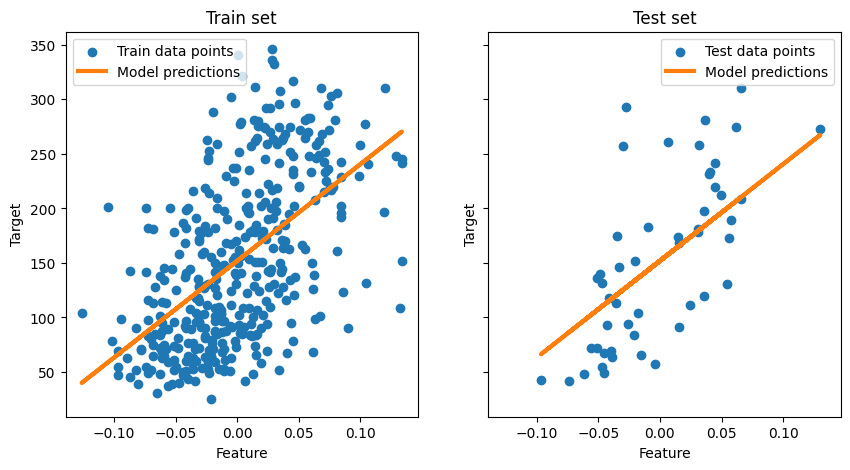

In [130]:
# Data Loading and Preparation
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [8]]    # extract and use single feature for simplicity 
print(f"Simplified X's initial 5 samples: {X[0:5]}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, shuffle=False)

# Linear regression model
from sklearn import linear_model
regressor = linear_model.LinearRegression().fit(X_train, y_train)

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score    # r2_score: coefficient of determination 

y_predicted = regressor.predict(X_test)
metric1 = mean_squared_error(y_test, y_predicted)
metric2 = r2_score(y_test, y_predicted)

print(f'Mean squared error: {metric1:.2f}')
print(f'Coefficient of determination: {metric2:.2f}')

# Plotting the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label='Train data points')
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color='tab:orange',
    label='Model predictions',
)
ax[0].set(xlabel='Feature', ylabel='Target', title='Train set')
ax[0].legend()

ax[1].scatter(X_test, y_test, label='Test data points')
ax[1].plot(X_test, y_predicted, linewidth=3, color='tab:orange', label='Model predictions')
ax[1].set(xlabel='Feature', ylabel='Target', title='Test set')
ax[1].legend()

#### Important Note on OLS and Regularization 
* OLS fits a line to minimize MSE on training data.
    * OLS learns coefficients that minimize mean squared error (MSE) on training set.
* Test performance measured by $R^2$ and MSE shows generalization quality.
* **Problem**: OLS can overfit high-dimensional or noisy data.
    * This results in high variance and poor generalization.
* Ridge/Lasso regularization reduces overfitting by penalizing coefficients.
    * Ridge/Lasso add penalties to shrink coefficients which results in more stable predictions.
    * Regularization modifies the objective:
        * Ridge regularization in mathematical form: $$ MSE + \alpha \sum \beta_j^2 $$ 
        * Lasso regularization in mathematical form: $$ MSE + \alpha \sum \left| \beta_j \right| $$
    * **Effect**: Shrinks coefficients, controls complexity, improves generalization.

##### 3.2.1.2 Ordinary Least Squares and Ridge Regression Variance
* Example problem of high variance
    * Use a tiny dataset with repeated *Gaussian noise*.
    * Refit **OLS** and **Ridge** on each noisy sample.
    * **OLS lines** vary a alot which represents *high variance*.
    * **Ridge lines** stay stable which shows that *penalty reduces variance*. 


X_train, size, dtype: (array([[0.5],
       [1. ]]), 2, dtype('float64'))
{'ols': LinearRegression(), 'ridge': Ridge(alpha=0.1)}
dict_items([('ols', LinearRegression()), ('ridge', Ridge(alpha=0.1))])
dict_keys(['ols', 'ridge'])


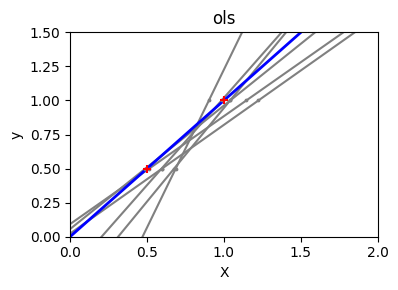

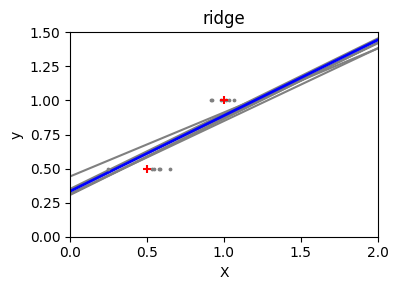

In [200]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

X_train = np.c_[0.5, 1].T     
# Note: NumPy shortcut for column stacking, it creates a 1×2 row vector. 
# .T is the transpose. Transposing the 1×2 row gives a 2×1 column vector. 
# Result: X_train is a 2×1 matrix, suitable as a single-feature training dataset in scikit-learn.
print(f'X_train, size, dtype: {X_train, np.size(X_train), X_train.dtype}')
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

# define classifiers 
classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)
print(classifiers)
print(classifiers.items())
print(classifiers.keys())
for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4,3))

    for _ in range(6):    # Loops 6 times: 0 through 5 (_ is a throwaway variable)
        this_X = 0.1 * np.random.normal(size=(2,1)) + X_train    # generates a 2×1 array of Gaussian noise (mean 0, std 1), create a slightly noisy version of the original training data
        clf.fit(this_X, y_train)

        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)
        ax.plot(X_test, clf.predict(X_test), color='gray')

    clf.fit(X_train, y_train)
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.5))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

#### Important Note on OLS Variance and Ridge Regulariation 
* OLS lines varied drastically each time noise was added, reflecting its high variance when data is sparse or noisy.
* By contrast, Ridge regression introduces a regularization term that shrinks the coefficients, stabilizing predictions.
* Techniques like Ridge or Lasso (which applies an L1 penalty) are both common ways to improve generalization and reduce overfitting.
* A well-tuned Ridge or Lasso often outperforms pure OLS when features are correlated, data is noisy, or sample size is small.

##### 3.2.1.3 Non-Negative Least Squares
* Coefficients can be constrained to be *non-negative* (useful for things like counts or prices).
* In **LinearRegression**, set `positive=True`. This applies Non-Negative Least Squares.
##### 3.2.1.4 OLS Complexity 
* Least squares solution (like in `LinearRegression/OLS`) is computed using **Singular Value Decomposition** (SVD) of the input matrix `X`.
* If `X` has shape (`n_samples`, `n_features`), the **computation cost** is roughly: $ O\Big(\min(n_{\text{samples}}^2 \cdot n_{\text{features}}, \ n_{\text{samples}} \cdot n_{\text{features}}^2)\Big)$
* This means:
    * **More samples or more features result in higher computation cost.**
    * SVD is *numerically stable*, so it’s preferred for solving linear regression.
* **in a nutshell:** SVD is a robust way to compute coefficients, but can be expensive for very large datasets. 

#### Important Note on using LinearRegression
* <span style='color:blue'>class</span> sklearn.linear_model.**LinearRegression**(*, `fit_intercept`=True, copy_X=True, tol=1e-06, n_jobs=None, `positive`=False)
    * `fit_intercept` (bool, default=True): Include intercept? If False, assumes data is centered.
    * `positive` (bool, default=False): Force coefficients ≥ 0 (only for dense arrays).
    * `fit`(X, y, sample_weight=None): Train the linear model.
    * `predict`(X): Make predictions with the model.
    * `score`(X, y, sample_weight=None): Compute $R^2$(coefficient of determination) on test data.

#### 3.2.2 Ridge regression and classification
##### Regression
* **Ridge Regression** improves Ordinary Least Squares (OLS) by adding a penalty on large coefficients.
* It finds coefficients that minimize: $ RSS + \alpha \sum_{j=1}^p \beta_j^2 $
    * RSS: Residual Sum of Squares. It’s the total squared difference between the observed values $(y_i)$ and the predicted values $(\hat{y}_i)$ from the model. 
    * $\alpha$ controls the penalty (shrinkage):
        * Larger $\alpha$: stronger shrinkage which inturn results in smaler and more stable coefficients.
        * Smaller $\alpha$: closer to OLS
* Like other linear models, you `fit` **Ridge** with `X` and `y`. The learned coefficients are stored in `.coef_`

##### **Ridge** usage:
    * <span style='color:blue'> class </span> sklearn.linear_model.**Ridge**(`alpha`=1.0, *, `fit_intercept`=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', `positive`=False, random_state=None).
    * Linear least squares with *l2 regularization* (i.e. regularization is given by **l2-norm**). aka **Tikhonov** regularization.
    * Built-in support for *multi-variate regression*. 
        * When `y` is a 2d-array of shape (`n_samples`, `n_targets`)).
        * When you want to predict **multiple outputs** at once (multi-variate regression).
        * It learns **one set of coefficients per target**.
        * So if you have 3 features and 2 outputs, you’ll get a coefficient matrix of shape (2, 3).
    * `alpha` (float or array, default=1.0): Controls regularization strength.
        * Higher = stronger penalty (coefficients shrink more).
        * 0 = same as Ordinary Least Squares (use LinearRegression instead of Ridge).
        * Can be an array to set different penalties per target.
        * Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or LinearSVC.
    * `fit_intercept` (bool, default=True): If False, model won’t calculate intercept: assumes data is already centered.
    * `positive` (bool, default=False): If True, coefficients are forced to be non-negative (only works with solver = “lbfgs”).
    * `coef_`: Coefficients (weight vector(s)). Shape = (n_features,) for single output, (n_targets, n_features) for multi-output.
    * `intercept_`: Independent term in decision function. 0.0 if fit_intercept=False. Float or ndarray of shape (n_targets,).
    * `fit`(X, y, sample_weight=None): Train the Ridge model.
    * `predict`(X): Predict outputs for given inputs.
    * `score`(X, y, sample_weight=None): Returns $R^2$ (coefficient of determination):
        * Formula: $ R^2 = 1 - RSS/TSS $ where,
            * RSS: Residual Sum of Squares = $ \sum (y_{true} - y_{pred})^2  $
            * TSS: Total Sum of Squares = $ \sum (y_{true} - \bar{y})^2 $
        * $R^2$ = 1 indicates a **perfect fit**
        * $R^2$ = 0 indicates a constant model that **always predicts the expected value of y**, disregarding the input features. i.e. **same as predicting mean of `y`**. 
        * $R^2$ < 0 indicates the **fit is arbitrarily worse**, also **worse than just predicting mean**! 

In [213]:
from sklearn import linear_model
import numpy as np
regressor = linear_model.Ridge(alpha=0.5)
X = [[0, 0],
    [0, 0],
    [1, 1]]
y = [0, 0.1, 1]
regressor.fit(X, y)
print(f'Model: {regressor}')
print(f'Learned coefficients: {np.round(regressor.coef_, 3)}')
print(f'Learned intercept: {regressor.intercept_}')
print(f'R^2 score: {regressor.score(X, y)}')

Model: Ridge(alpha=0.5)
Learned coefficients: [0.345 0.345]
Learned intercept: 0.13636363636363638
R^2 score: 0.9179910998092816


#### Important Note when using Ridge 
* Ridge Solver Selection (solver="auto")
    * Ridge automatically picks a solver based on these conditions, from top to bottom:
| Solver | Condition |
|---|---|
|lbfgs|If `positive=True` is specified|
|cholesky|If input array `X` is not sparse|
|sparse_cg|Otherwise|
    * So you usually don’t need to set the solver manually unless you want full control.

##### Classification: RidgeClassifier (Classification variant of Ridge)
* Converts **binary targets** to `{-1, 1}` and **treats classification as a regression problem**.
* Predicted class = sign of regressor output.
* **Multiclass**: treated as multi-output regression. Predicted class = output with highest value.
* **Uses penalized least squares loss** instead of logistic/hinge loss:
    * *Works surprisingly well in practice* (similar accuracy/precision/recall).
    * Allows *choice of different numerical solvers* which can be computationally faster.
* Faster than LogisticRegression for many classes: projection matrix computed only once.
* Sometimes called a **Least Squares Support Vector Machine** (SVM) with a linear kernel.

##### Ridge Complexity
* This method has the same order of complexity as Ordinary Least Squares. 

##### Setting the regularization parameter: leave-one-out Cross-Validation
* `RidgeCV` / `RidgeClassifierCV`: Ridge regression/classification with **automatic alpha tuning** via cross-validation.
* Work like GridSearchCV, but default to efficient Leave-One-Out CV.
* Alpha cannot be 0 when using default CV (required by Leave-One-Out formulation).
* **Automatically finds the best regularization strength** for your model.
* Note
    * Setting the cv attribute overrides the default Leave-One-Out CV.
    * Example: cv=10 → use 10-fold cross-validation.
    * Internally, this uses GridSearchCV to select the best alpha.